# Chapter 7 Problem 6 (Gelman & Hill)

*Repeat the previous exercise using a logistic regression example.*

Incidentally, we can use the same dataset of the previous exercise. The [Breast Cancer Wisconsin (Prognostic)](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29) dataset could in fact be used both for regression and classification purposes. 

In this exercise we will focus on predicting the outcome (R = recurrent, N = nonrecurrent). The outcome variable represents the time before recurrence. R means there were recurrences before 24 months, whereas N identifies cases where there were no recurrence beyond 24 months.

In [2]:
library(foreign)
library(arm)
library(ggplot2)

In [29]:
breast <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data",
                    sep=",")
colNames <- c("id", "outcome", "time", "radius_mean", "texture_mean", "perimeter_mean", 
              "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", 
              "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", 
              "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", 
              "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", 
              "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
              "concave_points_worst", "symmetry_worst", "fractal_dimension_worst", 
              "tumor_size", "lymph_node_status")
colnames(breast) <- colNames

# create a function to standardise regression predictors by centering and dividing by 2 standard deviations
standardise <- function(x) {
    return(x - mean(x, na.rm=TRUE)) / (2 * sd(x, na.rm=TRUE))
}

breast$lymph_node_status <- as.numeric(breast$lymph_node_status)

X <- breast[, c(-1, -2, -3)]
breast <- cbind(breast[, c(1, 2, 3)], sapply(X,  standardise))
head(breast)

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,ellip.h,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
1,119513,N,31,0.6076768,5.32399,2.643434,42.95909,-0.007791414,-0.03904778,-0.04764278,⋯,-0.6477778,31.04141,-0.02442076,-0.1725018,-0.1226853,-0.06177753,-0.05570404,-0.009698131,2.152525,12.42424
2,8423,N,61,0.5776768,-11.89601,7.943434,30.95909,0.01571859,0.1349522,0.1438572,⋯,44.25222,614.0414,0.01827924,0.3004982,0.2752147,0.08662247,0.136696,0.02807187,0.1525253,5.424242
3,842517,N,116,3.957677,-4.83601,22.64343,402.9591,-0.01432141,-0.02374778,-0.03074278,⋯,18.75222,544.0414,-0.02512076,-0.02020182,-0.0952853,0.02442247,0.109996,-0.0001581313,-0.3474747,-4.575758
4,843483,N,123,-5.992323,-1.89601,-37.27657,-583.9409,0.03981859,0.1412522,0.08515722,⋯,-41.47778,-837.2586,0.06587924,0.5011982,0.2502147,0.07872247,0.340396,0.08217187,-0.8474747,-4.575758
5,843584,R,27,2.877677,-7.93601,20.24343,326.9591,-0.002381414,-0.009847778,0.04175722,⋯,11.85222,170.0414,-0.006520758,-0.1601018,-0.0366853,-0.01627753,-0.08700404,-0.01404813,0.6525253,-4.575758
6,843786,R,77,-4.662323,-6.98601,-30.25657,-467.3409,0.01621859,0.01425222,0.01015722,⋯,-33.04778,-671.7586,0.02667924,0.05449818,0.1632147,-0.007877525,0.02509596,0.02707187,-0.3474747,-4.575758


glm(formula = outcome ~ texture_mean + area_worst + concavity_worst + 
    fractal_dimension_worst, family = binomial(link = "logit"), 
    data = breast)
                        coef.est coef.se
(Intercept)             -1.24     0.18  
texture_mean            -0.06     0.04  
area_worst               0.00     0.00  
concavity_worst         -0.14     1.58  
fractal_dimension_worst  0.18    13.58  
---
  n = 198, k = 5
  residual deviance = 204.9, null deviance = 217.0 (difference = 12.1)


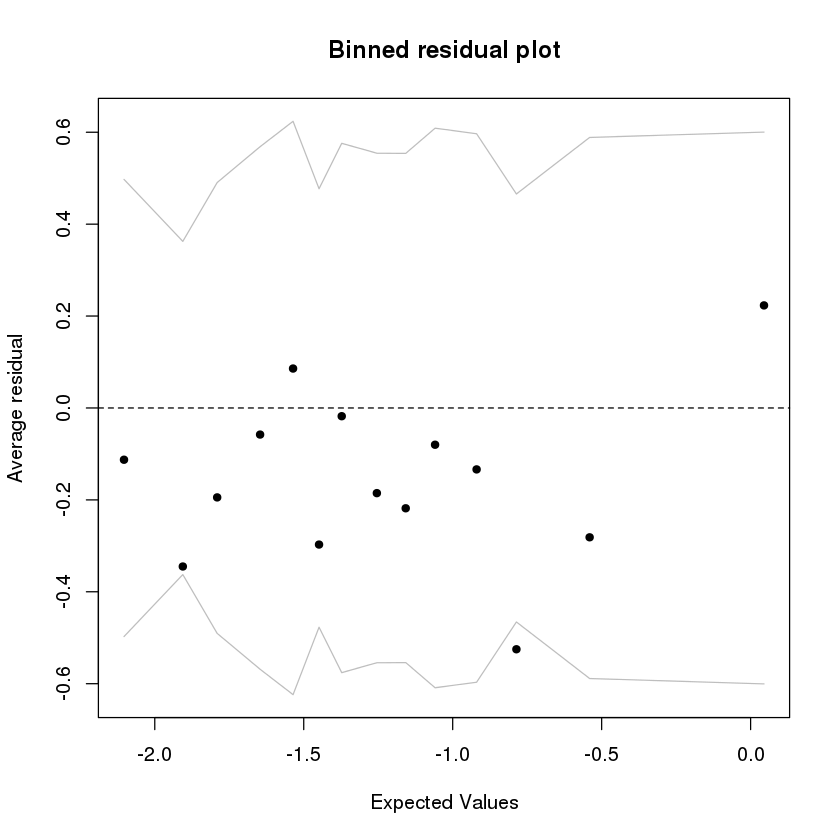

In [49]:
m1 <- glm(outcome ~ texture_mean + area_worst + concavity_worst + fractal_dimension_worst, 
          family=binomial(link="logit"), data=breast)
display(m1)
binnedplot(predict(m1), residuals(m1))

We will now generate a predictive distribution of two hypothetical patients which differ only for the `concavity worst` variable. The first patients has a worst concavity 0.2 standard deviations from the mean, whereas the second patient has a worst concavity 1 standard deviation from the mean. We will see that the larger the worst concavity is, the higher is the chance of nonrecurrence beyond 24 months (outcome `R`).

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


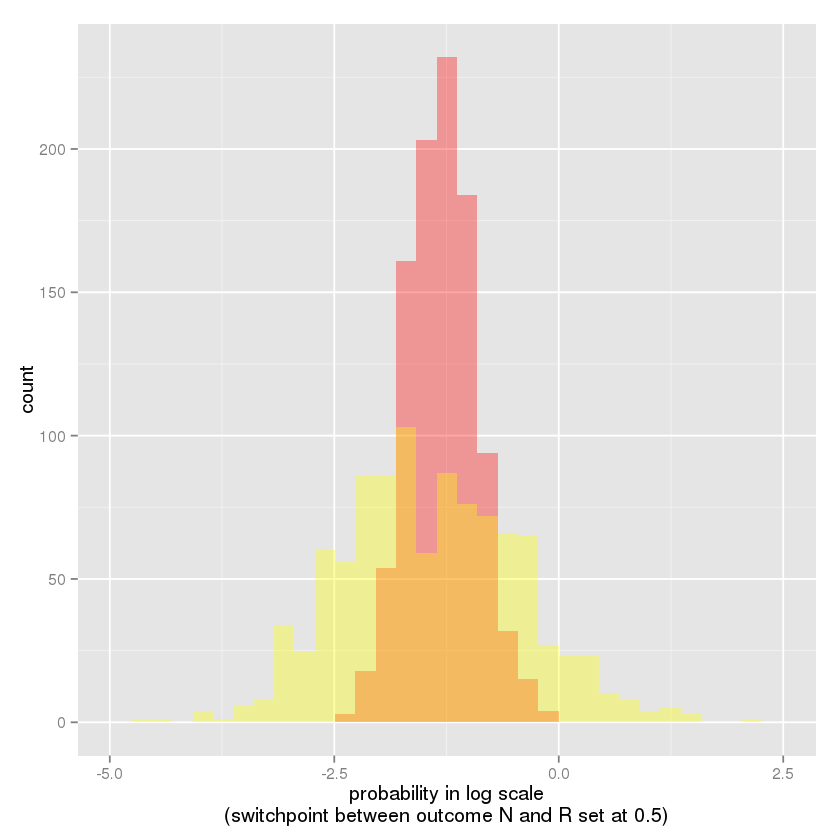

In [62]:
sim.outcome <- sim(m1, 1000)

s1 <- coef(sim.outcome)[, 1] + 0 * coef(sim.outcome)[, 2] + 
    0.5 * coef(sim.outcome)[, 3] + 0.2 * coef(sim.outcome)[, 4] + 
    0 * coef(sim.outcome)[, 5]

s2 <- coef(sim.outcome)[, 1] + 0 * coef(sim.outcome)[, 2] + 
    0.5 * coef(sim.outcome)[, 3] + 0.6 * coef(sim.outcome)[, 4] + 
    0 * coef(sim.outcome)[, 5]

ggplot(data=data.frame(x1=s1, x2=s2)) + geom_histogram(aes(x=s1), fill="red", alpha=.35) +
    geom_histogram(aes(x=s2), fill="yellow", alpha=.35) + labs(x="probability in log scale\n(switchpoint between outcome N and R set at 0.5)")